<a href="https://colab.research.google.com/github/VimalRency/Spectogram/blob/main/waveform_and_power_spectral_density_of_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-cc21bc2d0e62>:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


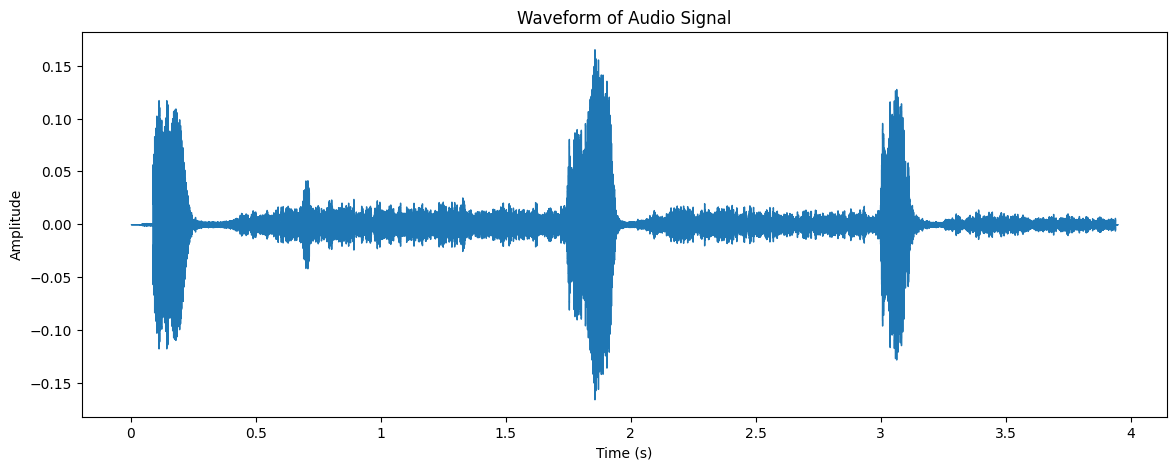

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_file = '/content/vno.m4a'  # Replace with your audio file path
y, sr = librosa.load(audio_file)

# Plot the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of Audio Signal')
plt.show()


<ipython-input-2-1206008982b1>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


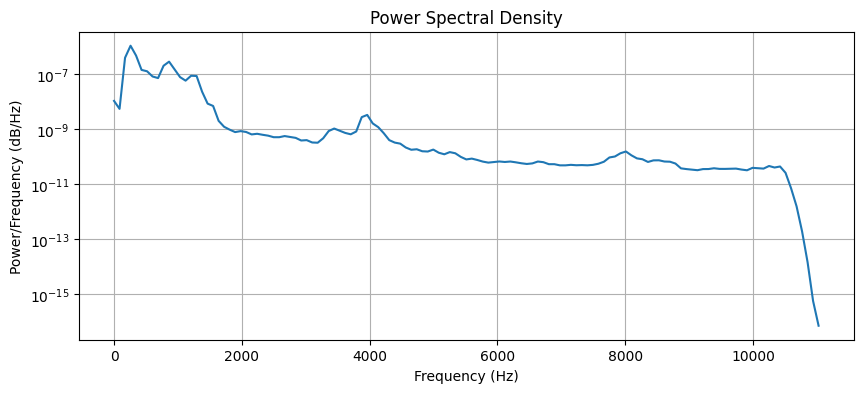

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy import signal

# Load the audio file
audio_file = '/content/vno.m4a'  # Replace with your audio file path
y, sr = librosa.load(audio_file)

# Calculate the Power Spectral Density (PSD)
frequencies, psd = signal.welch(y, sr)

# Plot the PSD
plt.figure(figsize=(10, 4))
plt.semilogy(frequencies, psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density')
plt.grid()
plt.show()


In [ ]:
!pip install gtts==2.3.1
!pip install pydub==0.25.1
!pip install SpeechRecognition==3.9.0
!pip install sounddevice==0.4.5
!apt-get install -qq libportaudio2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 6.7 MB/s eta 0:00:00
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1.1_amd64.deb ...
Unpacking libportaudio2:amd64 (19.6.0-1.1) ...
Setting up libportaudio2:amd64 (19.6.0-1.1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_proxy.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link



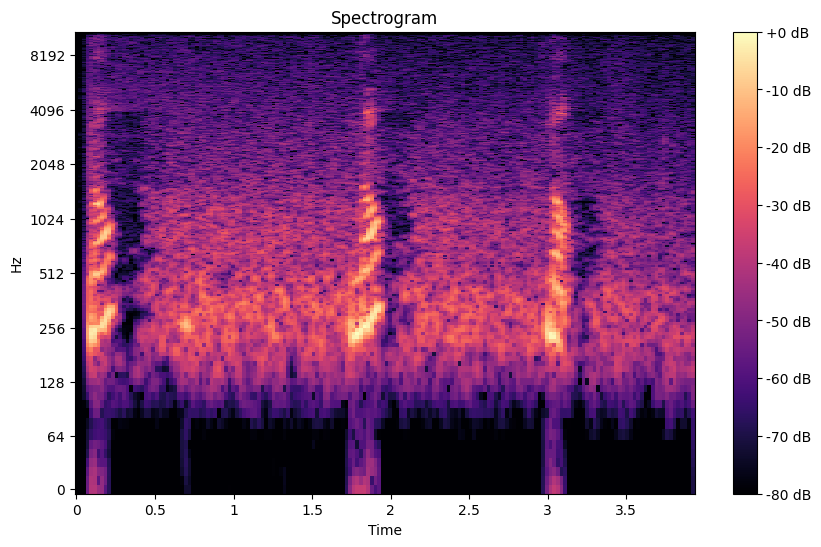

result2:
{   'alternative': [   {'confidence': 0.68514389, 'transcript': 'no no'},
                       {'confidence': 0.7616685, 'transcript': 'no no no'},
                       {'confidence': 0.80223751, 'transcript': 'no no no no'},
                       {'confidence': 0.68514389, 'transcript': 'no know'},
                       {'confidence': 0.68514389, 'transcript': 'know know'}],
    'final': True}
Recognized text: no no
Saved recognized text as mp3: /content/vno.m4a
Converted recognized mp3 to wav: /content/vno.m4a
An error occurred during the TTS conversion or playback: Error querying device -1


In [ ]:
from gtts import gTTS
from pydub import AudioSegment
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import speech_recognition as sr
import sounddevice as sd
import soundfile as sf

# Specify the path to your own MP3 file
mp3_file_path = r"/content/vno.m4a"

def process_audio_file(mp3_path):
    try:
        # Step 1: Convert MP3 to WAV
        sound = AudioSegment.from_file(mp3_path)
        wav_path = mp3_path.replace('.m4a', '.wav')
        sound.export(wav_path, format="wav")

        # Step 2: Load the audio file and generate the spectrogram
        y, sample_rate = librosa.load(wav_path)
        D = librosa.stft(y)  # Short-time Fourier transform
        S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

        # Plot the spectrogram
        plt.figure(figsize=(10, 6))
        librosa.display.specshow(S_db, sr=sample_rate, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')
        plt.show()

        # Step 3: Recognize speech from the audio file
        recognizer = sr.Recognizer()
        audio_file = sr.AudioFile(wav_path)
        with audio_file as source:
            audio_data = recognizer.record(source)

        text = ""  # Default value in case recognition fails
        try:
            text = recognizer.recognize_google(audio_data)
            print(f"Recognized text: {text}")
        except sr.UnknownValueError:
            print("Google Speech Recognition could not understand the audio")
        except sr.RequestError as e:
            print(f"Could not request results from Google Speech Recognition service; {e}")

        # Step 4: Convert the recognized text back to audio
        if text:  # Check if text is not empty
            try:
                tts = gTTS(text, lang='en')
                recognized_mp3_path = mp3_path.replace('.mp3', '_recognized.mp3')
                tts.save(recognized_mp3_path)
                print(f"Saved recognized text as mp3: {recognized_mp3_path}")

                # Convert mp3 to wav
                sound = AudioSegment.from_mp3(recognized_mp3_path)
                recognized_wav_path = recognized_mp3_path.replace('.mp3', '.wav')
                sound.export(recognized_wav_path, format="wav")
                print(f"Converted recognized mp3 to wav: {recognized_wav_path}")

                # Step 5: Playback the final audio
                data, fs = sf.read(recognized_wav_path, dtype='float32')
                sd.play(data, fs)
                sd.wait()
                print(f"Played back the audio for: {recognized_wav_path}")
            except Exception as e:
                print(f"An error occurred during the TTS conversion or playback: {e}")
        else:
            print(f"No text recognized; skipping text-to-speech conversion.")

    except Exception as e:
        print(f"An error occurred while processing the audio file: {e}")

# Call the function with your MP3 file path
process_audio_file(mp3_file_path)


<ipython-input-6-7ced2f4d8d3c>:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


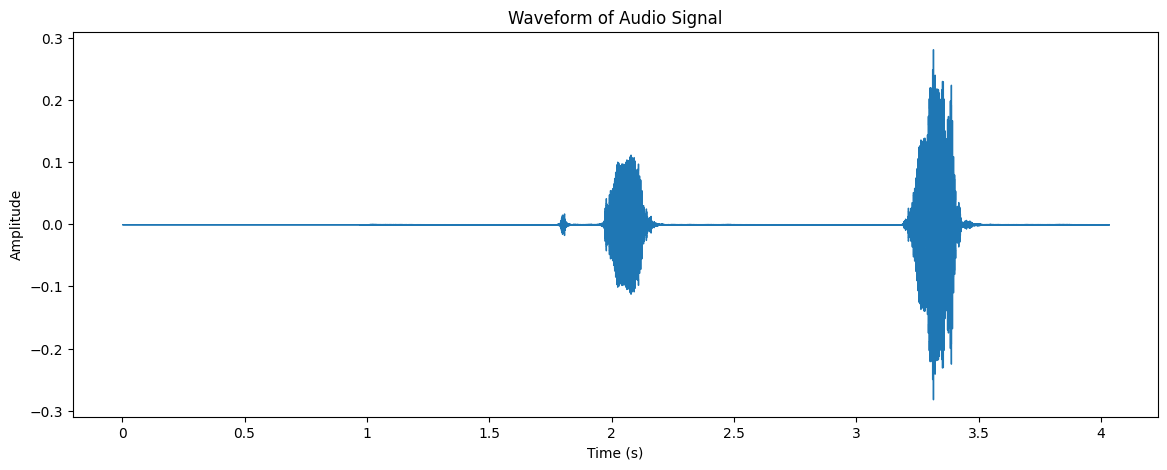

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_file = '/content/test.m4a'  # Replace with your audio file path
y, sr = librosa.load(audio_file)

# Plot the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of Audio Signal')
plt.show()


<ipython-input-7-04e1bf9a7fba>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


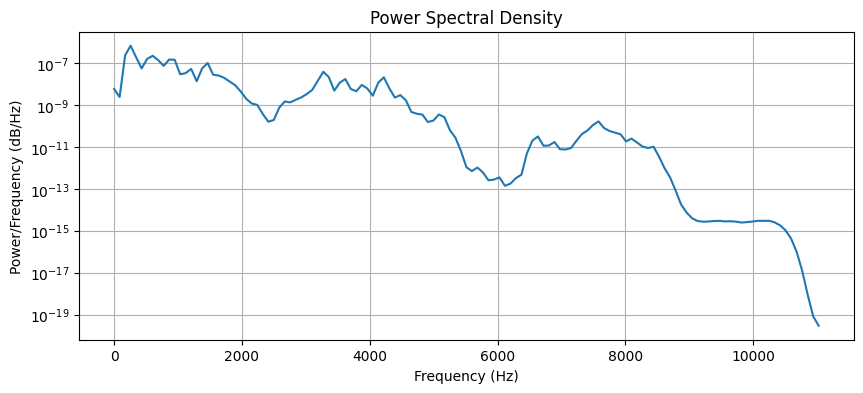

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy import signal

# Load the audio file
audio_file = '/content/test.m4a'  # Replace with your audio file path
y, sr = librosa.load(audio_file)

# Calculate the Power Spectral Density (PSD)
frequencies, psd = signal.welch(y, sr)

# Plot the PSD
plt.figure(figsize=(10, 4))
plt.semilogy(frequencies, psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density')
plt.grid()
plt.show()


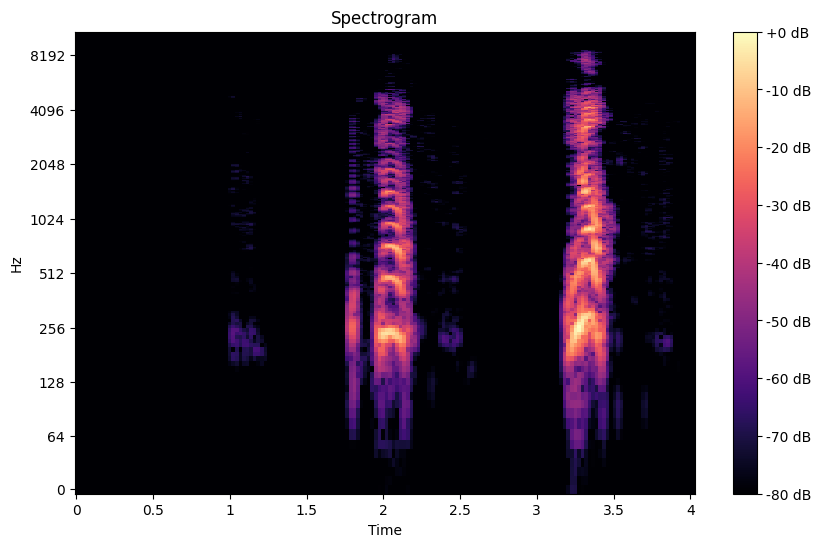

result2:
{   'alternative': [   {'confidence': 0.65954864, 'transcript': 'no no'},
                       {'confidence': 0.65954864, 'transcript': 'no know'},
                       {'confidence': 0.65954864, 'transcript': 'know know'},
                       {'confidence': 0.65954864, 'transcript': 'no nooo'}],
    'final': True}
Recognized text: no no
Saved recognized text as mp3: /content/test.m4a
Converted recognized mp3 to wav: /content/test.m4a
An error occurred during the TTS conversion or playback: Error querying device -1


In [ ]:
from gtts import gTTS
from pydub import AudioSegment
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import speech_recognition as sr
import sounddevice as sd
import soundfile as sf

# Specify the path to your own MP3 file
mp3_file_path = r"/content/test.m4a"

def process_audio_file(mp3_path):
    try:
        # Step 1: Convert MP3 to WAV
        sound = AudioSegment.from_file(mp3_path)
        wav_path = mp3_path.replace('.m4a', '.wav')
        sound.export(wav_path, format="wav")

        # Step 2: Load the audio file and generate the spectrogram
        y, sample_rate = librosa.load(wav_path)
        D = librosa.stft(y)  # Short-time Fourier transform
        S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

        # Plot the spectrogram
        plt.figure(figsize=(10, 6))
        librosa.display.specshow(S_db, sr=sample_rate, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')
        plt.show()

        # Step 3: Recognize speech from the audio file
        recognizer = sr.Recognizer()
        audio_file = sr.AudioFile(wav_path)
        with audio_file as source:
            audio_data = recognizer.record(source)

        text = ""  # Default value in case recognition fails
        try:
            text = recognizer.recognize_google(audio_data)
            print(f"Recognized text: {text}")
        except sr.UnknownValueError:
            print("Google Speech Recognition could not understand the audio")
        except sr.RequestError as e:
            print(f"Could not request results from Google Speech Recognition service; {e}")

        # Step 4: Convert the recognized text back to audio
        if text:  # Check if text is not empty
            try:
                tts = gTTS(text, lang='en')
                recognized_mp3_path = mp3_path.replace('.mp3', '_recognized.mp3')
                tts.save(recognized_mp3_path)
                print(f"Saved recognized text as mp3: {recognized_mp3_path}")

                # Convert mp3 to wav
                sound = AudioSegment.from_mp3(recognized_mp3_path)
                recognized_wav_path = recognized_mp3_path.replace('.mp3', '.wav')
                sound.export(recognized_wav_path, format="wav")
                print(f"Converted recognized mp3 to wav: {recognized_wav_path}")

                # Step 5: Playback the final audio
                data, fs = sf.read(recognized_wav_path, dtype='float32')
                sd.play(data, fs)
                sd.wait()
                print(f"Played back the audio for: {recognized_wav_path}")
            except Exception as e:
                print(f"An error occurred during the TTS conversion or playback: {e}")
        else:
            print(f"No text recognized; skipping text-to-speech conversion.")

    except Exception as e:
        print(f"An error occurred while processing the audio file: {e}")

# Call the function with your MP3 file path
process_audio_file(mp3_file_path)
